Лабораторная работа №3\
Тарасов Никита 381806-3

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%autosave 10

Autosaving every 10 seconds


## Функция и значения

Функция Химмельблау:\
$z = f(x, y) = (x^2 + y - 11)^2 + (x + 2y^2 - 7)^2$


In [2]:
func = lambda x: (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [3]:
n = 20
X = np.linspace(-5, 5, n)
Y = np.linspace(-5, 5, n)
X, Y = np.meshgrid(X, Y)
Z = func([X, Y])

## Визуализация

In [4]:
 def show_plot(X, Y, Z, x_point=None, y_point=None, elev=45, azim=-160): 
  fig = plt.figure()
  ax = Axes3D(fig)
  fig.add_axes(ax)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.plot_wireframe(X, Y, Z)

  if (x_point and y_point):
    ax.scatter3D(x_point, y_point, func([x_point, y_point]), c='red', s=30)

  ax.view_init(elev, azim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


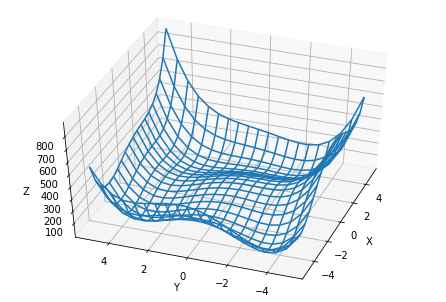

In [5]:
show_plot(X, Y, Z)

## Поиск минимума

In [6]:
import scipy.optimize as opt

In [7]:
min = opt.minimize(func, [1, 1], method='nelder-mead')
x_min, y_min = min.x
y_min, x_min

(1.999961432924816, 3.0000050368879094)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


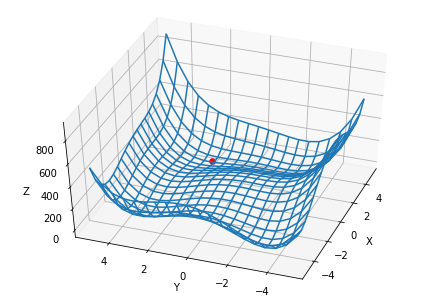

In [8]:
show_plot(X, Y, Z, x_min, y_min)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


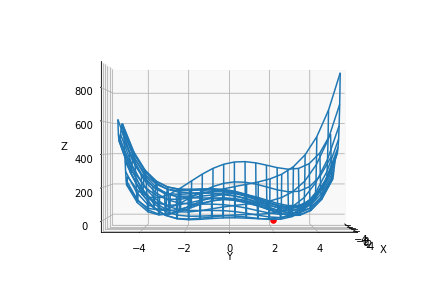

In [9]:
show_plot(X, Y, Z, x_min, y_min, 0, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


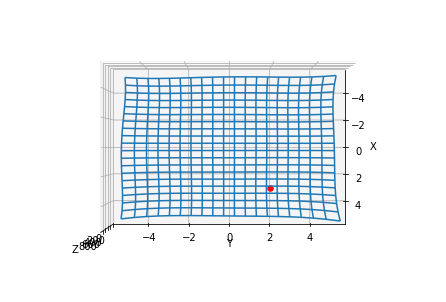

In [10]:
show_plot(X, Y, Z, x_min, y_min, 90, 0)

## Градиент

In [11]:
from sympy import Function

x, y = sympy.symbols('x y')

f_dx_label = Function('f')(x, y).diff(x)
f_dy_label = Function('f')(x, y).diff(y)

expr = (x**2 + y - 11)**2 + (x + y**2 -7)**2

f_dx = sympy.Eq(f_dx_label, sympy.diff(expr, x))
f_dy = sympy.Eq(f_dy_label, sympy.diff(expr, y))

In [12]:
f_dx

Eq(Derivative(f(x, y), x), 4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14)

In [13]:
f_dy

Eq(Derivative(f(x, y), y), 2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22)

In [14]:
from sympy.vector import CoordSys3D, gradient

R = CoordSys3D('R')
f = (R.x**2 + R.y - 11)**2 + (R.x + R.y**2 -7)**2

gradient(f)

(4*R.x*(R.x**2 + R.y - 11) + 2*R.x + 2*R.y**2 - 14)*R.i + (2*R.x**2 + 4*R.y*(R.x + R.y**2 - 7) + 2*R.y - 22)*R.j